<a href="https://colab.research.google.com/github/Namrata-cse/Stock_prediction/blob/main/StockPred_Decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install quantrautil

     |████████████████████████████████| 54 kB 1.7 MB/s 
  Created wheel for fix-yahoo-finance: filename=fix_yahoo_finance-0.1.35-py3-none-any.whl size=12443 sha256=f5cfd9f8b7439f26787b73f3724cc90aa8464d4e46993c15b36d13dc4d3f4bfb
  Stored in directory: /root/.cache/pip/wheels/f2/07/79/c1afd8c99db1cefa2501c3f202046cd7658df78ba5398b078b
  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36084 sha256=f0f93a1b8fe6173f96763058ae5f984da986109ddcff1c7aa130a17fb2eca62e
  Stored in directory: /root/.cache/pip/wheels/32/ab/d9/78ceea14cdf6de83376082b3cb0c2999fd77f823e35c47b9ec
Successfully built fix-yahoo-finance nsepy
  Attempting uninstall: fix-yahoo-finance
    Found existing installation: fix-yahoo-finance 0.0.22
    Uninstalling fix-yahoo-finance-0.0.22:
      Successfully uninstalled fix-yahoo-finance-0.0.22


In [26]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import quantrautil as q
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
data = q.get_data('BAC','2000-1-1','2019-2-1')

Exception in thread Thread-11:
Traceback (most recent call last):
  File "/usr/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.7/dist-packages/multitasking/__init__.py", line 104, in _run_via_pool
    return callee(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/fix_yahoo_finance/__init__.py", line 322, in _download_one_threaded
    period, interval, prepost)
  File "/usr/local/lib/python3.7/dist-packages/fix_yahoo_finance/__init__.py", line 333, in _download_one
    actions=actions, auto_adjust=auto_adjust)
  File "/usr/local/lib/python3.7/dist-packages/fix_yahoo_finance/__init__.py", line 239, in history
    data = data.json()
  File "/usr/local/lib/python3.7/dist-packages/requests/models.py", line 898, in json
    return complexjson.loads(self.text, **kwargs)
  File "/usr/lib/python3.7/json/__init__.py", lin

In [ ]:
data.tail()

,Open,High,Low,Close,Volume,Source
Date,,,,,,
2017-03-08,67.70,74.90,67.00,70.55,200493,nsepy
2017-03-09,70.05,74.45,69.25,72.40,97649,nsepy
2017-03-10,73.40,73.40,69.95,70.00,11007,nsepy
2017-03-14,73.00,82.00,70.05,80.90,643894,nsepy
2017-03-15,82.85,85.80,78.80,83.10,385258,nsepy


In [ ]:
data.info

<bound method DataFrame.info of              Open   High    Low  Close  Volume Source
Date                                                 
2000-01-03  17.25  18.70  15.30  18.35   88900  nsepy
2000-01-04  18.00  19.00  16.05  16.55   39900  nsepy
2000-01-05  14.50  17.50  14.50  17.05   14100  nsepy
2000-01-06  17.15  17.60  15.75  15.75   11750  nsepy
2000-01-07  15.00  15.75  15.00  15.75    2500  nsepy
...           ...    ...    ...    ...     ...    ...
2017-03-08  67.70  74.90  67.00  70.55  200493  nsepy
2017-03-09  70.05  74.45  69.25  72.40   97649  nsepy
2017-03-10  73.40  73.40  69.95  70.00   11007  nsepy
2017-03-14  73.00  82.00  70.05  80.90  643894  nsepy
2017-03-15  82.85  85.80  78.80  83.10  385258  nsepy

[3859 rows x 6 columns]>

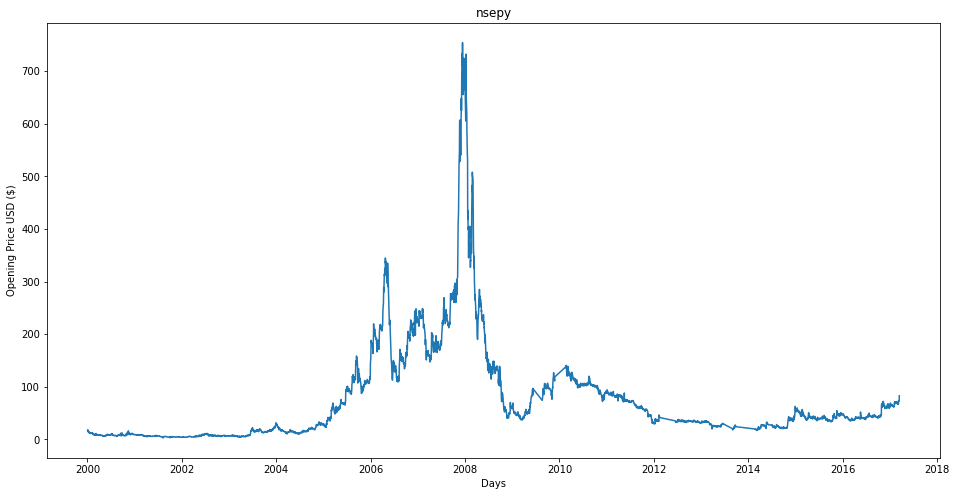

In [9]:
# Visualizing the opening prices of the data.
plt.figure(figsize=(16,8))
plt.title('nsepy')
plt.xlabel('Days')
plt.ylabel('Opening Price USD ($)')
plt.plot(data['Open'])
plt.show()

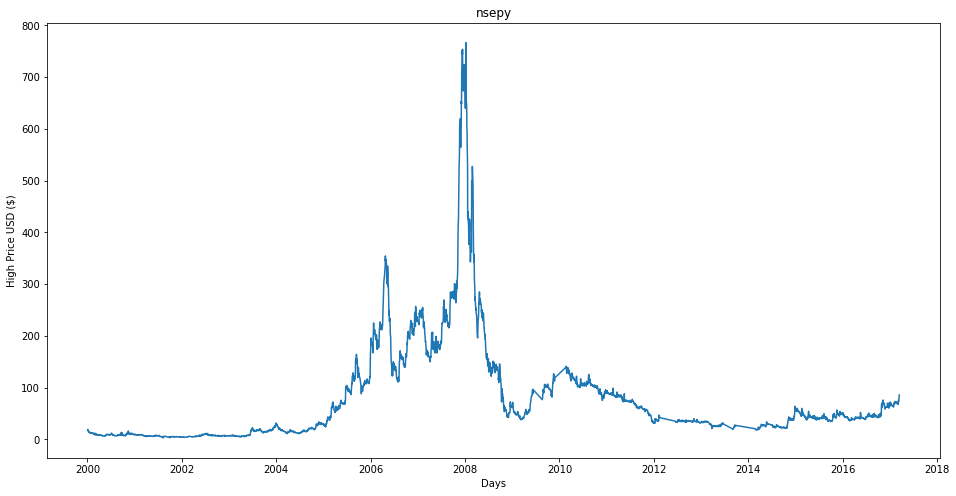

In [10]:
# Visualizing the high prices of the data.
plt.figure(figsize=(16,8))
plt.title('nsepy')
plt.xlabel('Days')
plt.ylabel('High Price USD ($)')
plt.plot(data['High'])
plt.show()

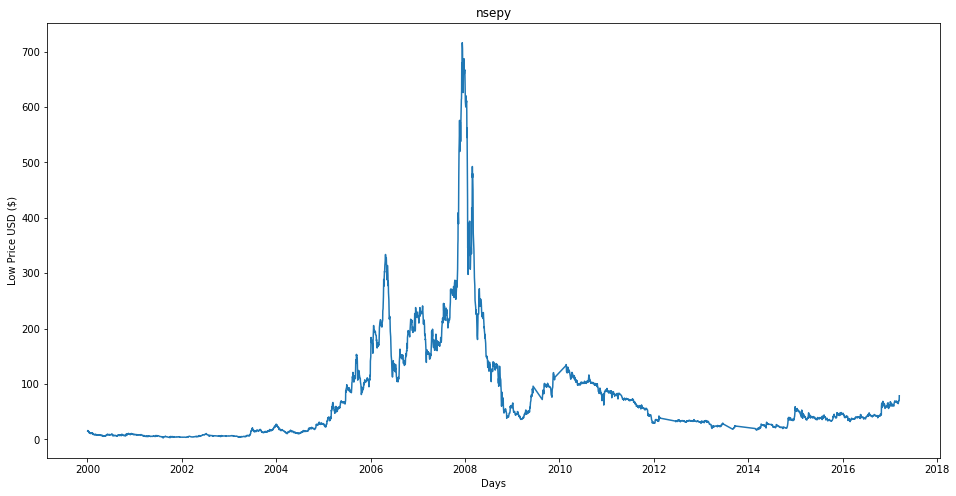

In [11]:
# Visualizing the low prices of the data.
plt.figure(figsize=(16,8))
plt.title('nsepy')
plt.xlabel('Days')
plt.ylabel('Low Price USD ($)')
plt.plot(data['Low'])
plt.show()

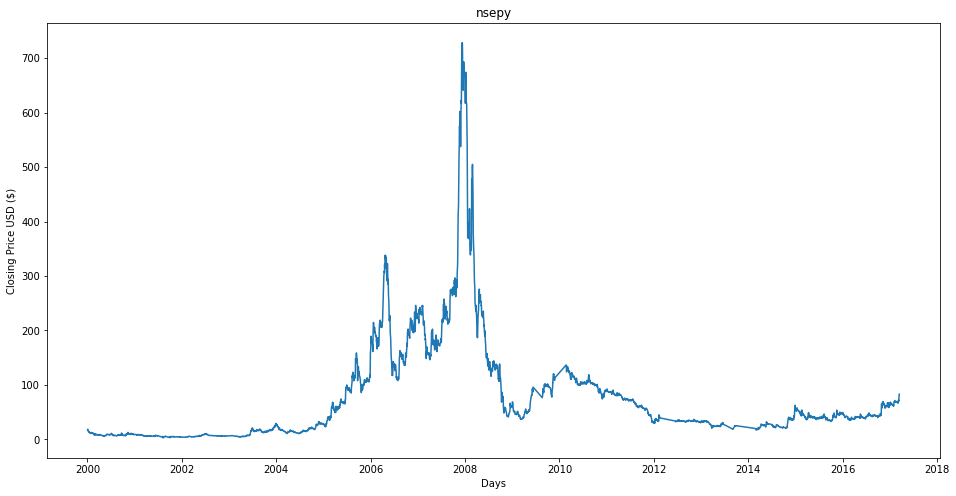

In [12]:
# Visualizing the closing prices of the data.
plt.figure(figsize=(16,8))
plt.title('nsepy')
plt.xlabel('Days')
plt.ylabel('Closing Price USD ($)')
plt.plot(data['Close'])
plt.show()

In [13]:
df2 = data['Close']

In [15]:
print(df2.tail())

Date
2017-03-08    70.55
2017-03-09    72.40
2017-03-10    70.00
2017-03-14    80.90
2017-03-15    83.10
Name: Close, dtype: float64


In [16]:
df2 = pd.DataFrame(df2)

In [18]:
# Prediction 100 days into the future.
future_days = 100
df2['Prediction'] = df2['Close'].shift(-future_days)

In [21]:
print(df2)

            Close  Prediction
Date                         
2000-01-03  18.35        9.75
2000-01-04  16.55        9.40
2000-01-05  17.05        9.15
2000-01-06  15.75        9.00
2000-01-07  15.75        9.05
...           ...         ...
2017-03-08  70.55         NaN
2017-03-09  72.40         NaN
2017-03-10  70.00         NaN
2017-03-14  80.90         NaN
2017-03-15  83.10         NaN

[3859 rows x 2 columns]


In [22]:
X = np.array(df2.drop(['Prediction'], 1))[:-future_days]
print(X)

[[18.35]
 [16.55]
 [17.05]
 ...
 [43.5 ]
 [47.45]
 [45.7 ]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [23]:
y = np.array(df2['Prediction'])[:-future_days]
print(y)

[ 9.75  9.4   9.15 ... 70.   80.9  83.1 ]


In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [27]:
# Implementing Linear and Decision Tree Regression Algorithms.
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)

In [28]:
x_future = df2.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


array([[41.2 ],
       [41.3 ],
       [40.75],
       [40.1 ],
       [40.55],
       [41.2 ],
       [40.  ],
       [40.4 ],
       [40.3 ],
       [40.7 ],
       [40.4 ],
       [40.25],
       [39.35],
       [39.  ],
       [39.7 ],
       [39.4 ],
       [38.85],
       [39.  ],
       [38.65],
       [38.5 ],
       [38.85],
       [37.95],
       [37.85],
       [38.95],
       [40.15],
       [42.1 ],
       [41.85],
       [41.6 ],
       [42.2 ],
       [42.3 ],
       [42.2 ],
       [42.55],
       [44.75],
       [45.45],
       [46.05],
       [44.5 ],
       [43.05],
       [43.05],
       [43.25],
       [43.15],
       [48.45],
       [48.45],
       [45.95],
       [45.6 ],
       [44.7 ],
       [45.05],
       [45.45],
       [44.1 ],
       [43.8 ],
       [44.  ],
       [44.05],
       [43.6 ],
       [42.7 ],
       [43.  ],
       [43.9 ],
       [43.4 ],
       [42.05],
       [41.6 ],
       [43.95],
       [44.45],
       [43.75],
       [43.  ],
       [

In [29]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[64.65       42.9        50.175      44.73333333 48.0125     64.65
 66.3        80.625      39.325      85.65       80.625      50.06428571
 46.0625     59.7        67.6        49.3        65.0625     59.7
 53.3        64.65       65.0625     62.4        51.175      57.2
 75.65       52.075      46.75       39.2625     50.7125     73.6
 50.7125     36.33333333 40.         56.11666667 40.1        61.3
 56.85833333 56.85833333 62.95       60.98333333 52.625      52.625
 61.45       87.9625     45.0875     42.16666667 56.11666667 62.8
 56.03333333 62.45       62.45       62.375      56.875      58.975
 39.25       41.75       50.36666667 39.2625     39.25       50.025
 65.55       58.975      68.15       49.27142857 56.03333333 58.975
 62.95       62.375      51.125      61.55       61.1        63.65
 35.25       49.11666667 56.85833333 70.05       54.85       66.4375
 54.85       68.4        55.225      56.85833333 59.25       58.975
 58.975      68.9        50.03333333 50.73333333 48.46

In [30]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[55.09453029 55.15945366 54.80237511 54.38037317 54.67252836 55.09453029
 54.3154498  54.57514329 54.51021992 54.76991342 54.57514329 54.47775823
 53.89344786 53.66621605 54.12067967 53.92590955 53.56883099 53.66621605
 53.43898424 53.34159918 53.56883099 52.98452062 52.91959725 53.63375437
 54.41283486 55.67884066 55.51653222 55.35422379 55.74376403 55.80868741
 55.74376403 55.97099584 57.39931008 57.8537737  58.24331395 57.23700164
 56.29561272 56.29561272 56.42545946 56.36053609 59.80147493 59.80147493
 58.17839057 57.95115876 57.36684839 57.5940802  57.8537737  56.97730815
 56.78253802 56.91238477 56.94484646 56.65269127 56.06838091 56.26315103
 56.8474614  56.52284453 55.64637897 55.35422379 56.87992308 57.20453996
 56.75007634 56.26315103 56.13330428 55.93853416 56.78253802 56.26315103
 56.42545946 56.65269127 57.46423345 57.78885033 57.88623539 57.33438671
 57.07469321 57.00976983 56.29561272 56.68515296 56.45792115 56.10084259
 56.45792115 56.19822765 56.62022959 56.29561272 56

In [32]:
predictions = tree_prediction 
valid = df2[X.shape[0]:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


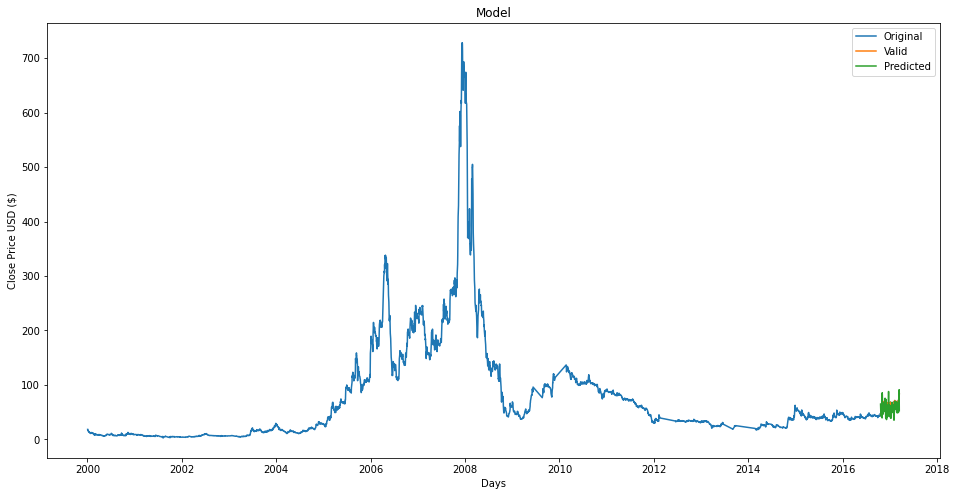

In [33]:
plt.figure(figsize=(16,8))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()